### LIBRARIES AND DATA IMPORT

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
file = "C:/Users/IROANYA/Documents/DATA ANALYSIS FILES/Hamoye-Internship/STAGE C/Data_for_UCI_named.csv"
dt = pd.read_csv(file)
df = dt.copy()
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df = df.drop('stab', axis = 1)

In [4]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


((10000, 13), None)

#### CORRELATION

<AxesSubplot:>

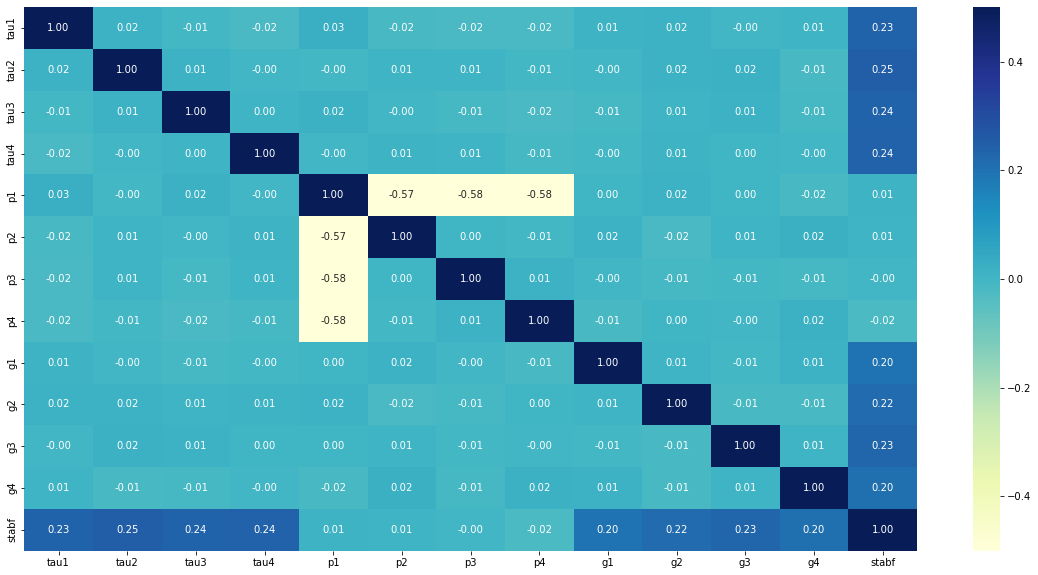

In [118]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=0.5, vmin=-0.5, annot=True, cmap="YlGnBu", fmt='.2f')

### DATA SCALING AND ENCODING

In [20]:
obj_col =df.select_dtypes(include = ['object'])

In [21]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

In [22]:
for i in obj_col:
    df[i] = encoder.fit_transform(df[i])

In [23]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [24]:
s_df = scaler.fit_transform(df.drop('stabf', axis = 1))
s_df = pd.DataFrame(s_df, columns = df.drop('stabf', axis  = 1).columns)
s_df['stabf'] = df['stabf']

In [25]:
df  = s_df.copy()

In [26]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,1
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,1
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,1
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,1


### SPLITTING

In [27]:
x = df.drop('stabf', axis = 1)
y = df['stabf']

In [52]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [53]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7000, 12), (7000,), (3000, 12), (3000,))

In [54]:
y_train.value_counts()

1    4464
0    2536
Name: stabf, dtype: int64

###### AN IMBALANCE BETWEEN THE CLASSES(STABLE(0) AND UNSTABLE(1)) HENCE WE SMOTE THE TRAINING SETS

In [55]:
smote = SMOTE(random_state=1)

In [56]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [57]:
y_train_smote.value_counts()

1    4464
0    4464
Name: stabf, dtype: int64

In [58]:
x_train.shape, x_train_smote.shape, x_test.shape

((7000, 12), (8928, 12), (3000, 12))

In [59]:
y_train.shape, y_train_smote.shape, y_test.shape

((7000,), (8928,), (3000,))

### MODELLING

In [60]:
models = {'XGBClassifier': XGBClassifier(),
         'Logistic Regressor': LogisticRegression(),
         'Random Forest': RandomForestClassifier(),
          'Extra Trees': ExtraTreesClassifier(),
         'LGBM Classifier': LGBMClassifier()}

In [61]:
def fit_score(model, x_train_smote, x_test, y_train_smote, y_test):
    
    np.random.seed = 42
    
    model_scores = {}
    
    for m_name, model in models.items():
        model.fit(x_train_smote, y_train_smote)
        
        model_scores[m_name] = model.score(x_test, y_test)
    return model_scores

In [62]:
scores = fit_score(model = models,
         x_train_smote= x_train_smote,
         x_test= x_test,
         y_train_smote= y_train_smote,
         y_test= y_test)
scores

{'XGBClassifier': 0.9376666666666666,
 'Logistic Regressor': 0.7896666666666666,
 'Random Forest': 0.9136666666666666,
 'Extra Trees': 0.919,
 'LGBM Classifier': 0.932}

### PREDICTING

In [69]:
predicted = {}
for m_name, model in models.items():
    
    predicted[m_name] = model.predict(x_test)

In [93]:
predicted

{'XGBClassifier': array([1, 1, 0, ..., 1, 0, 0]),
 'Logistic Regressor': array([1, 1, 0, ..., 1, 0, 0]),
 'Random Forest': array([1, 1, 0, ..., 1, 0, 1]),
 'Extra Trees': array([1, 1, 0, ..., 1, 0, 1]),
 'LGBM Classifier': array([1, 1, 0, ..., 1, 0, 0])}

In [70]:
type(predicted)

dict

In [82]:
pred = pd.DataFrame(data=predicted)

In [97]:
pred.head()

,XGBClassifier,Logistic Regressor,Random Forest,Extra Trees,LGBM Classifier
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


### METRICS CALCULATION

In [116]:
cnf = {}
prec = {}
rec = {}
acc = {}
for m_name, model in models.items():
    
   
    cnf[m_name] = confusion_matrix(y_test, model.predict(x_test), labels=[0, 1])
    prec[m_name] = round(precision_score(y_test, model.predict(x_test), pos_label=0)* 100, 2)
    rec[m_name] = round(recall_score(y_test, model.predict(x_test), pos_label=0)*100, 4)
    acc[m_name] = round(accuracy_score(y_test, model.predict(x_test)), 4)

In [110]:
cnf

{'XGBClassifier': array([[1000,   84],
        [ 103, 1813]], dtype=int64),
 'Logistic Regressor': array([[ 846,  238],
        [ 393, 1523]], dtype=int64),
 'Random Forest': array([[ 980,  104],
        [ 155, 1761]], dtype=int64),
 'Extra Trees': array([[ 960,  124],
        [ 119, 1797]], dtype=int64),
 'LGBM Classifier': array([[1008,   76],
        [ 128, 1788]], dtype=int64)}

In [111]:
prec

{'XGBClassifier': 90.66,
 'Logistic Regressor': 68.28,
 'Random Forest': 86.34,
 'Extra Trees': 88.97,
 'LGBM Classifier': 88.73}

In [112]:
rec

{'XGBClassifier': 92.25,
 'Logistic Regressor': 78.04,
 'Random Forest': 90.41,
 'Extra Trees': 88.56,
 'LGBM Classifier': 92.99}

In [117]:
acc

{'XGBClassifier': 0.9377,
 'Logistic Regressor': 0.7897,
 'Random Forest': 0.9137,
 'Extra Trees': 0.919,
 'LGBM Classifier': 0.932}

In [47]:
!pip install lightgbm